In [39]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [40]:
def load_metrics(file_path):
    """
    Load metrics from a results.txt file and return them as a dictionary.

    Args:
        file_path (str): Path to the results.txt file.

    Returns:
        dict: A dictionary containing the metrics as key-value pairs.
    """
    metrics = {}
    try:
        with open(file_path, 'r') as file:
            for line in file:
                # Split each line into key and value
                if ':' in line:
                    key, value = line.strip().split(':')
                    key = key.strip()
                    value = float(value.strip().strip(','))  # Convert value to float and handle trailing commas
                    metrics[key] = value
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
    except ValueError as e:
        print(f"Error parsing file {file_path}: {e}")
    return metrics

# Example usage
file_path = "/cim/ehoney/IFT6168_project/experiments/ignoring_intervs_nn/dataset_1_regimes-ignored_0/train/results.txt"
metrics = load_metrics(file_path)
print(metrics)

{'shd': 3.0, 'sid': 11.0, 'fn': 3.0, 'fp': 0.0, 'rev': 0.0, 'nll_val': 0.8780756522465218}


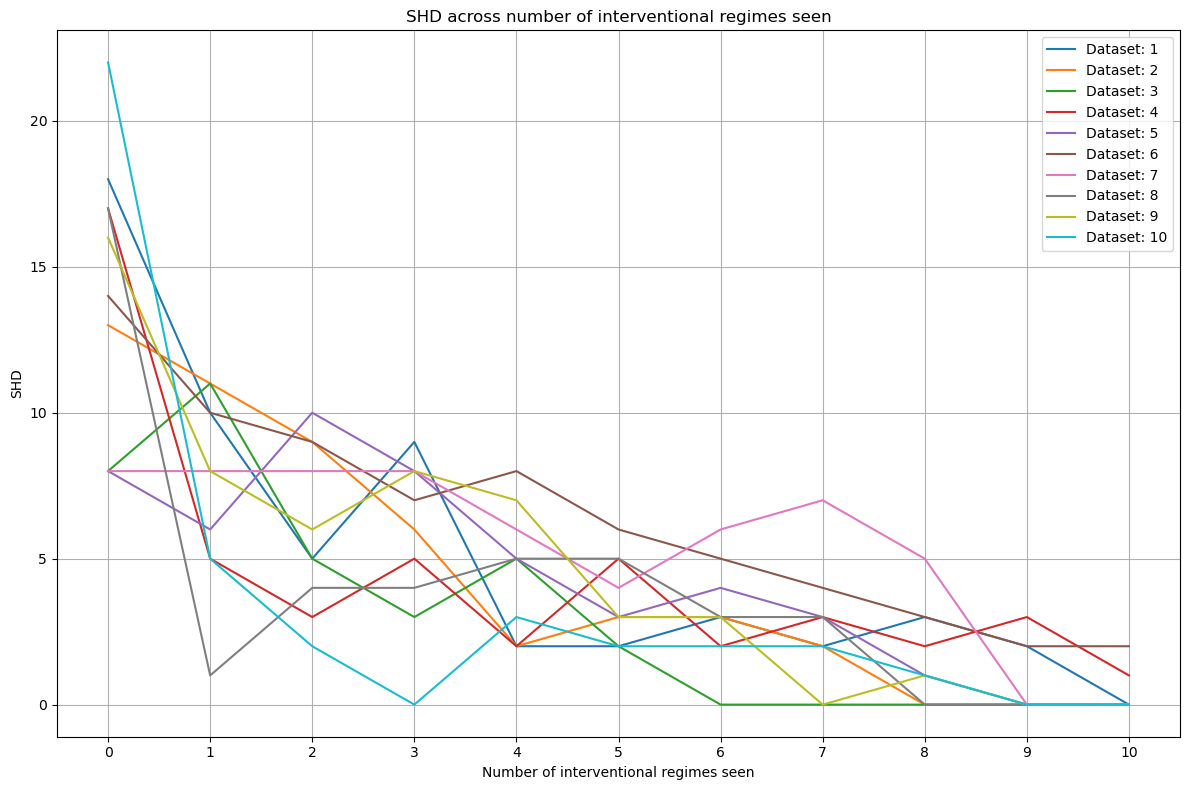

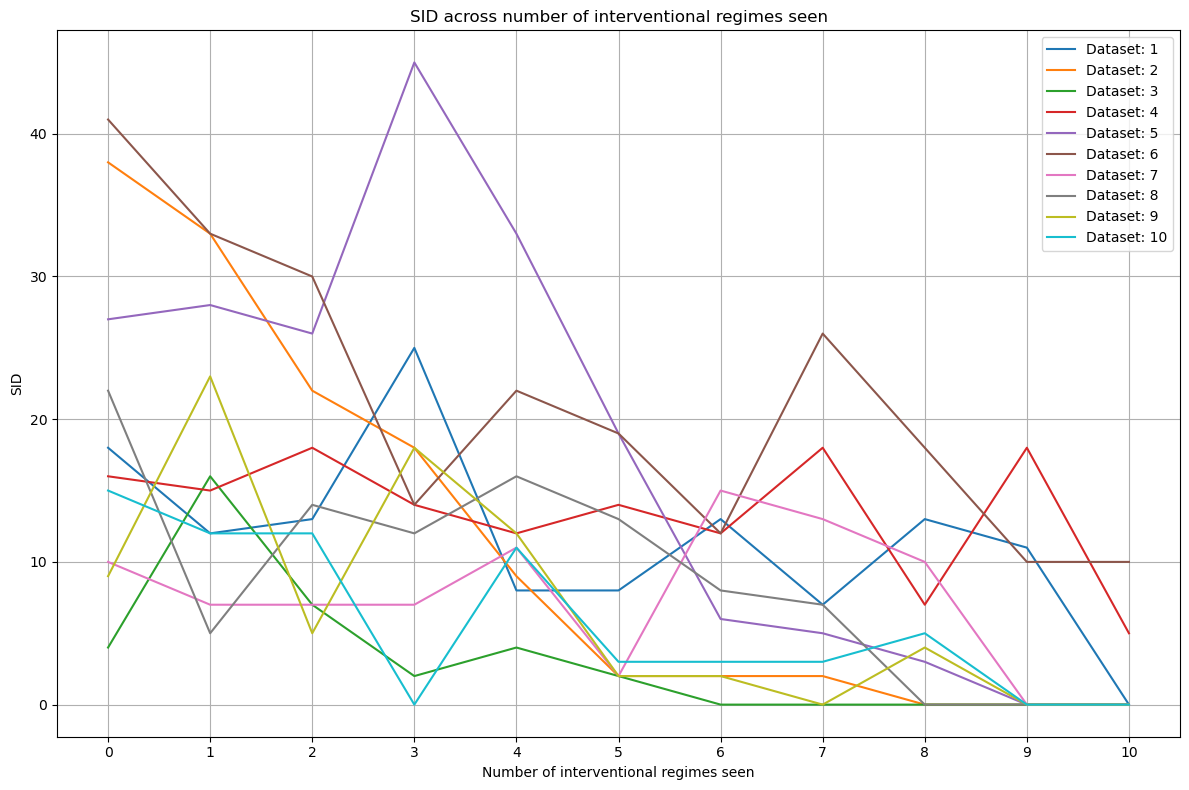

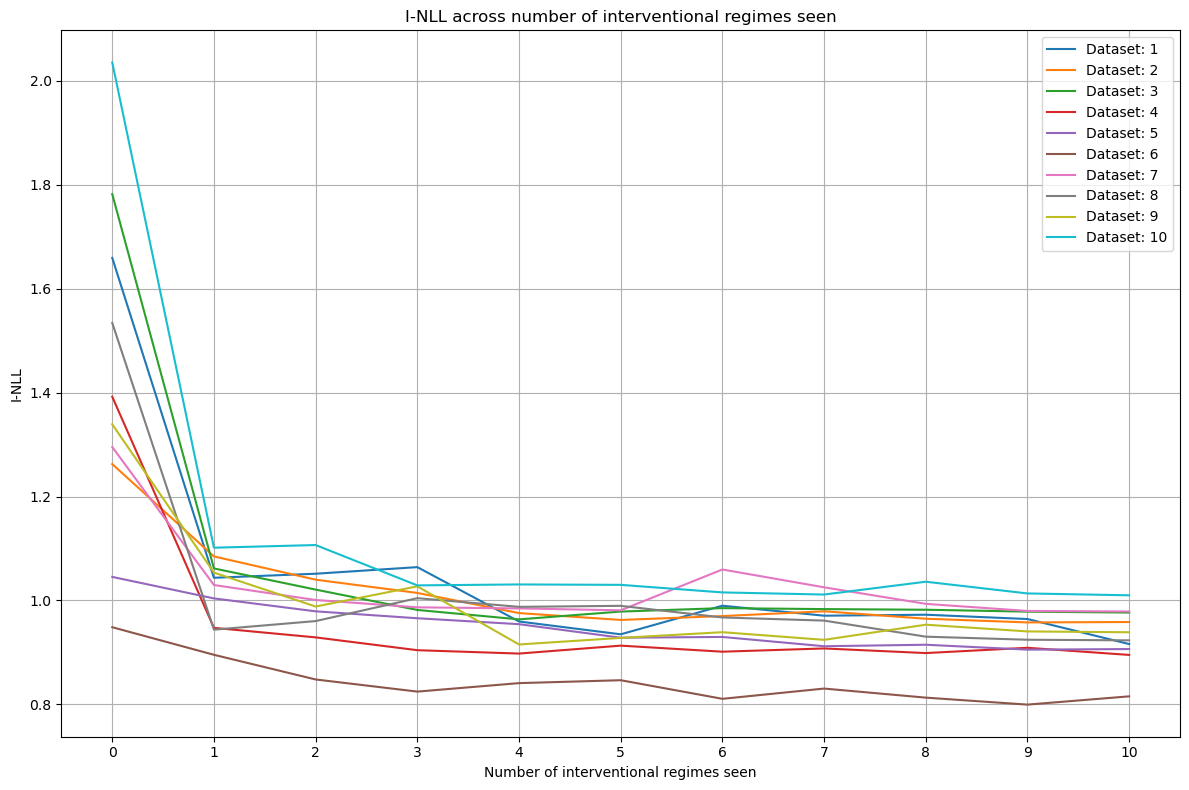

In [42]:
# Define the base directory and dataset indices
base_dir = "/cim/ehoney/IFT6168_project/experiments/proper"
dataset_indices = range(1, 11)  # Example dataset indices (adjust as needed)
regimes = [f"ignored_{i}" for i in range(10)] + ["ignored_all"]  # Regimes from ignored_0 to ignored_9 and ignored_all

# Initialize a dictionary to store metrics for plotting
metrics_data = {regime: [] for regime in regimes}

# Iterate through dataset indices and regimes
for dataset_index in dataset_indices:
    for regime in regimes:
        # Construct the file path
        file_path = f"{base_dir}/dataset_{dataset_index}_regimes-{regime}/train/results.txt"
        
        # Load metrics
        metrics = load_metrics(file_path)
        
        # Store specific metrics (e.g., 'shd', 'sid', 'nll_val') for plotting
        for metric_key in ['shd', 'sid', 'nll_val']:
            if metric_key not in metrics_data:
                metrics_data[metric_key] = {regime: [] for regime in regimes}
            if metric_key in metrics:
                metrics_data[metric_key][regime].append(metrics[metric_key])
            else:
                metrics_data[metric_key][regime].append(None)  # Handle missing values

# Transpose the metrics_data to have regimes on the x-axis and datasets as lines
transposed_data = {
    metric_key: {
        dataset_index: [metrics_data[metric_key][regime][dataset_index - 1] for regime in regimes]
        for dataset_index in dataset_indices
    }
    for metric_key in ['shd', 'sid', 'nll_val']
}

# Map regimes to 10 - i for x-axis labels
x_labels = [10 - int(regime.split('_')[1]) if regime != "ignored_all" else 0 for regime in regimes]

# Plot each metric separately with regimes on the x-axis
for metric_key, data in transposed_data.items():
    plt.figure(figsize=(12, 8))
    for dataset_index, values in data.items():
        plt.plot(x_labels, values, label=f"Dataset: {dataset_index}")
    
    plt.xlabel("Number of interventional regimes seen")
    metric_str = 'I-NLL' if metric_key == 'nll_val' else metric_key.upper()
    plt.ylabel(metric_str)
    plt.title(f"{metric_str} across number of interventional regimes seen")
    plt.xticks(ticks=x_labels, labels=[str(label) for label in x_labels], rotation=0)
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

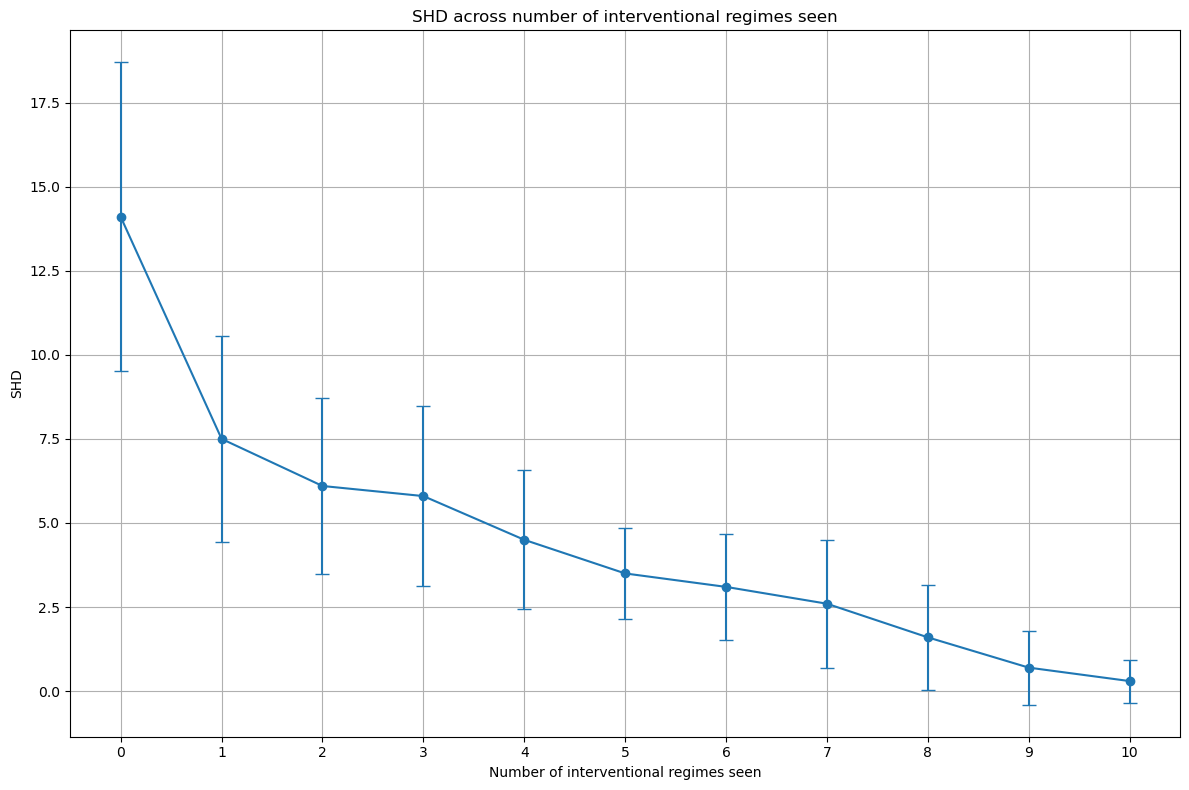

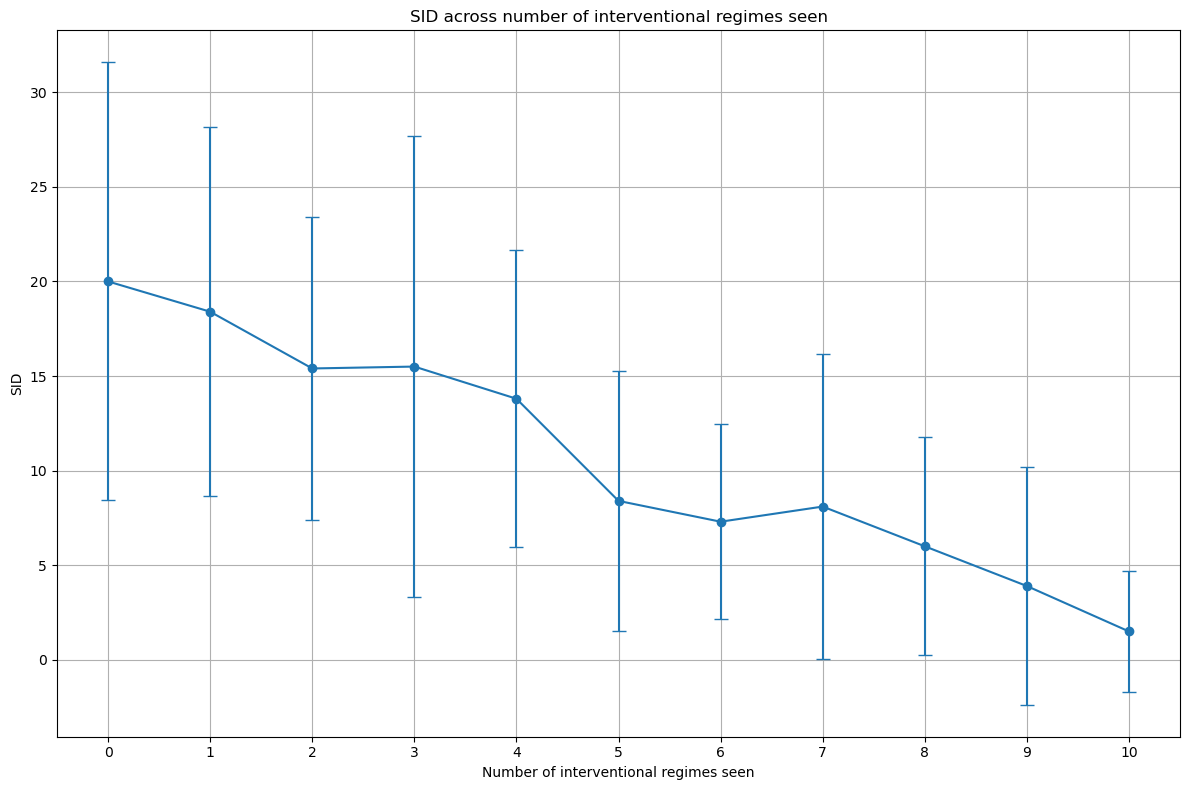

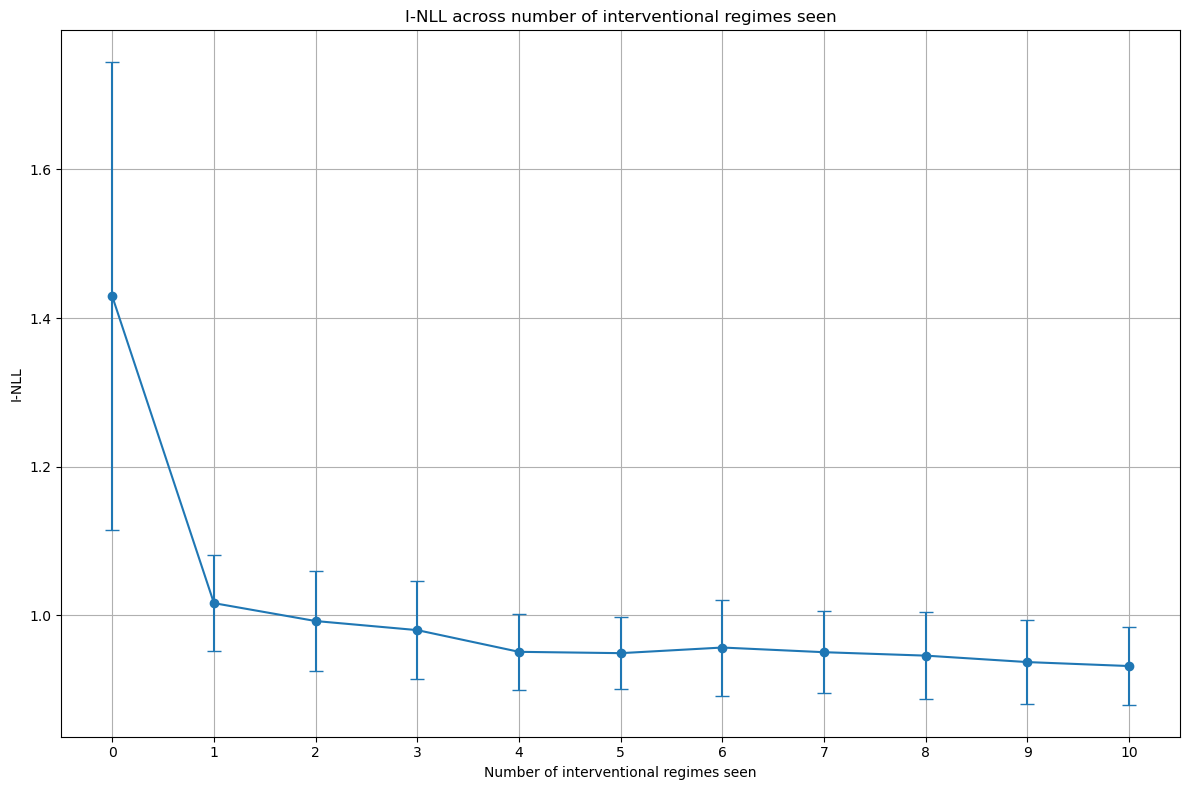

In [48]:
# Plot each metric separately with regimes on the x-axis, summarizing datasets with error bars
for metric_key, data in transposed_data.items():
    plt.figure(figsize=(12, 8))
    
    # Calculate mean and standard deviation for each regime across datasets
    means = [np.mean([data[dataset_index][i] for dataset_index in dataset_indices if data[dataset_index][i] is not None]) for i in range(len(x_labels))]
    stds = [np.std([data[dataset_index][i] for dataset_index in dataset_indices if data[dataset_index][i] is not None]) for i in range(len(x_labels))]
    
    # Plot the mean with error bars
    plt.errorbar(x_labels, means, yerr=stds, fmt='-o', capsize=5, label=f"{metric_key.upper()} Mean ± Std")
    
    plt.xlabel("Number of interventional regimes seen")
    metric_str = 'I-NLL' if metric_key == 'nll_val' else metric_key.upper()
    plt.ylabel(metric_str)
    plt.title(f"{metric_str} across number of interventional regimes seen")
    plt.xticks(ticks=x_labels, labels=[str(label) for label in x_labels], rotation=0)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

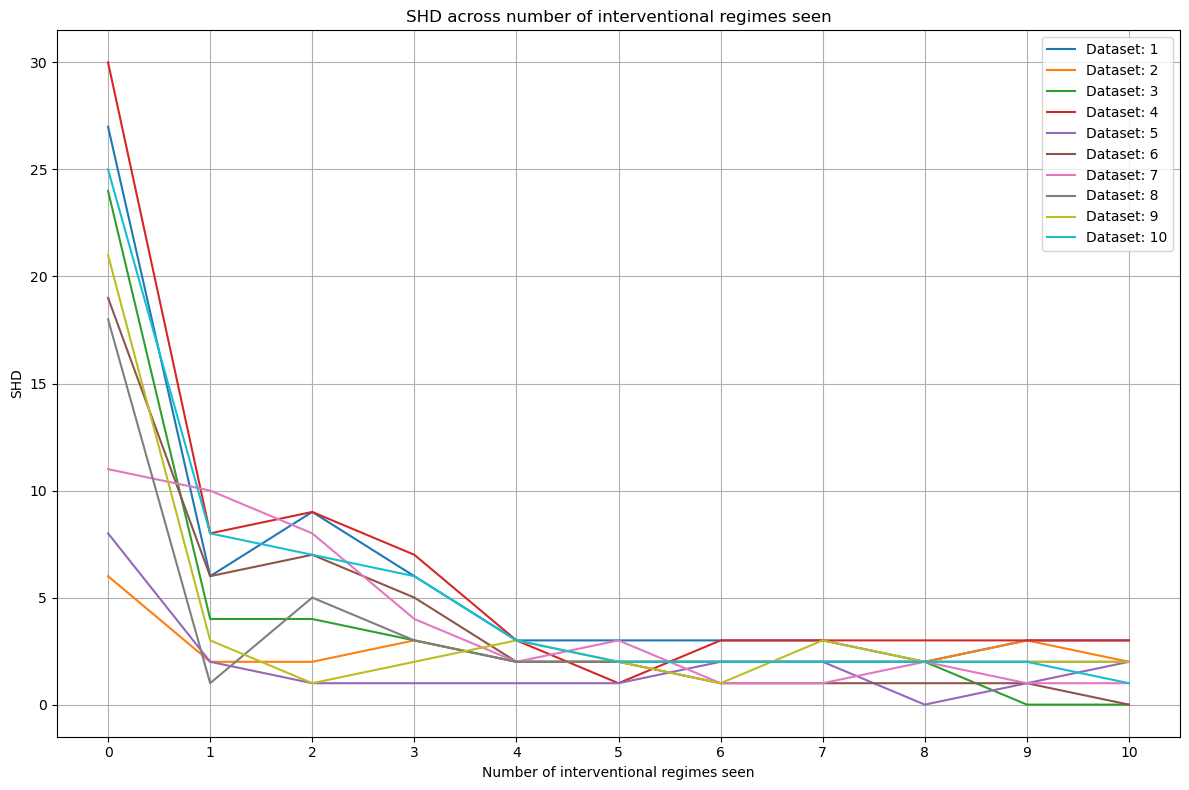

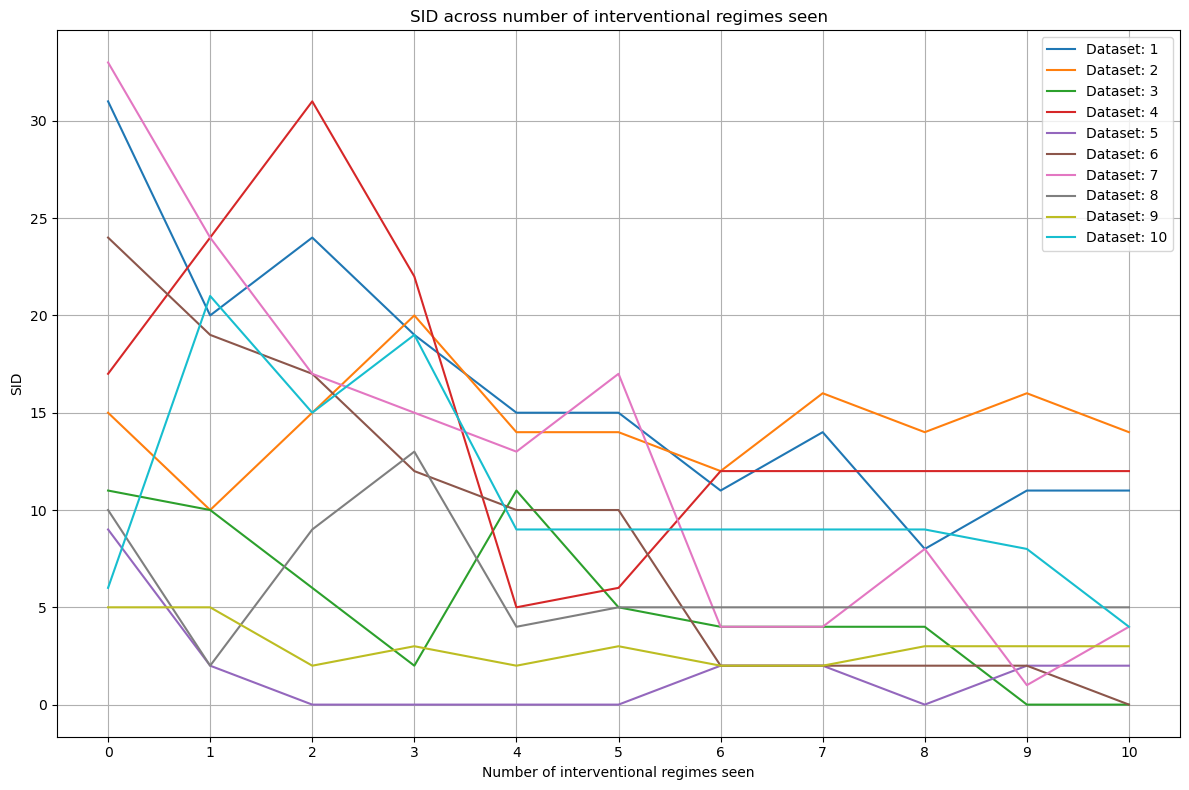

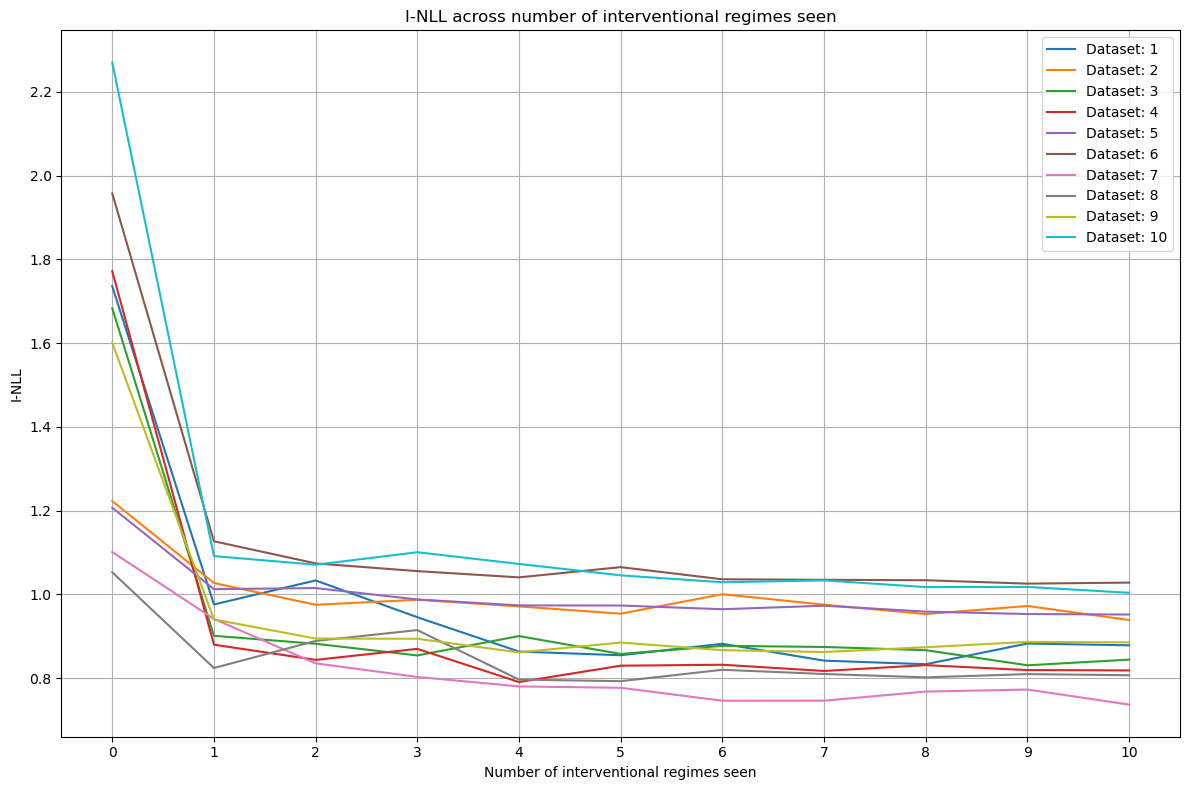

In [49]:
# Define the base directory and dataset indices
base_dir = "/cim/ehoney/IFT6168_project/experiments/ignoring_intervs_nn"
dataset_indices = range(1, 11)  # Example dataset indices (adjust as needed)
regimes = [f"ignored_{i}" for i in range(11)]

# Initialize a dictionary to store metrics for plotting
metrics_data = {regime: [] for regime in regimes}

# Iterate through dataset indices and regimes
for dataset_index in dataset_indices:
    for regime in regimes:
        # Construct the file path
        file_path = f"{base_dir}/dataset_{dataset_index}_regimes-{regime}/train/results.txt"
        
        # Load metrics
        metrics = load_metrics(file_path)
        
        # Store specific metrics (e.g., 'shd', 'sid', 'nll_val') for plotting
        for metric_key in ['shd', 'sid', 'nll_val']:
            if metric_key not in metrics_data:
                metrics_data[metric_key] = {regime: [] for regime in regimes}
            if metric_key in metrics:
                metrics_data[metric_key][regime].append(metrics[metric_key])
            else:
                metrics_data[metric_key][regime].append(None)  # Handle missing values

# Transpose the metrics_data to have regimes on the x-axis and datasets as lines
transposed_data = {
    metric_key: {
        dataset_index: [metrics_data[metric_key][regime][dataset_index - 1] for regime in regimes]
        for dataset_index in dataset_indices
    }
    for metric_key in ['shd', 'sid', 'nll_val']
}

# Map regimes to 10 - i for x-axis labels
x_labels = [10 - int(regime.split('_')[1]) if regime != "ignored_all" else 0 for regime in regimes]

# Plot each metric separately with regimes on the x-axis
for metric_key, data in transposed_data.items():
    plt.figure(figsize=(12, 8))
    for dataset_index, values in data.items():
        plt.plot(x_labels, values, label=f"Dataset: {dataset_index}")
    
    plt.xlabel("Number of interventional regimes seen")
    metric_str = 'I-NLL' if metric_key == 'nll_val' else metric_key.upper()
    plt.ylabel(metric_str)
    plt.title(f"{metric_str} across number of interventional regimes seen")
    plt.xticks(ticks=x_labels, labels=[str(label) for label in x_labels], rotation=0)
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

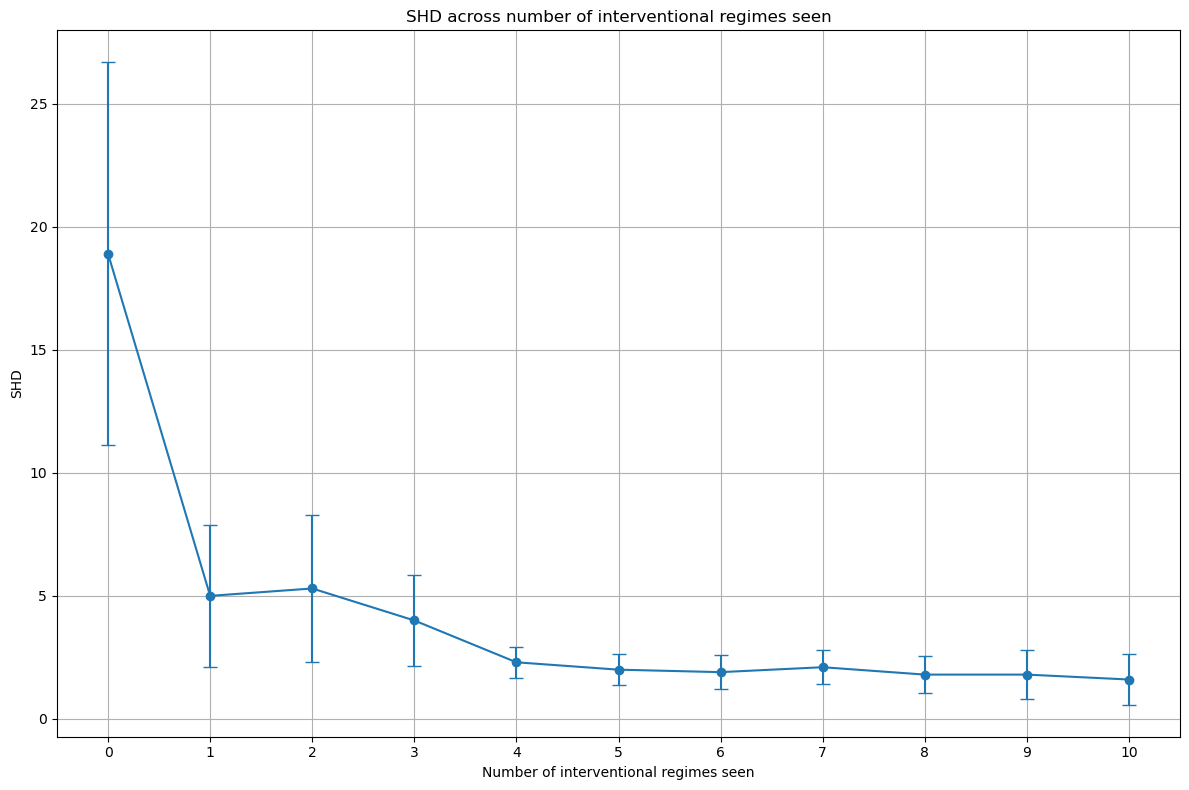

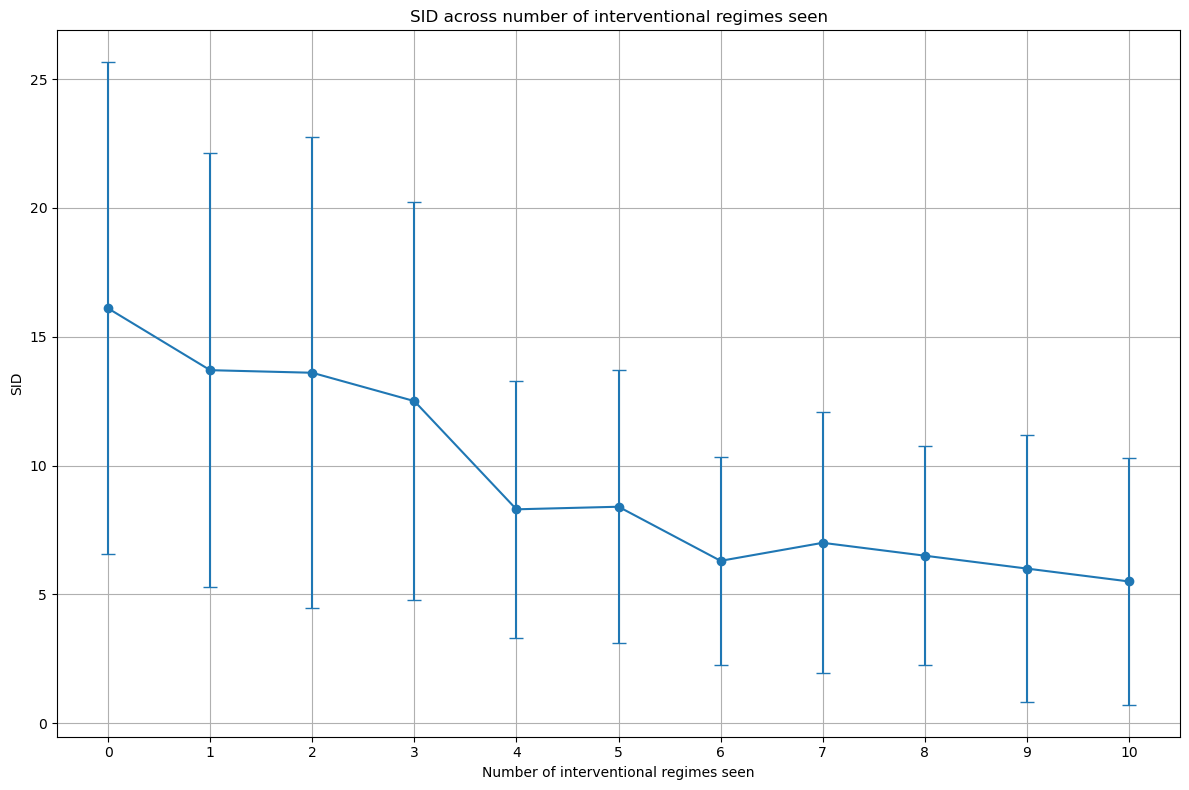

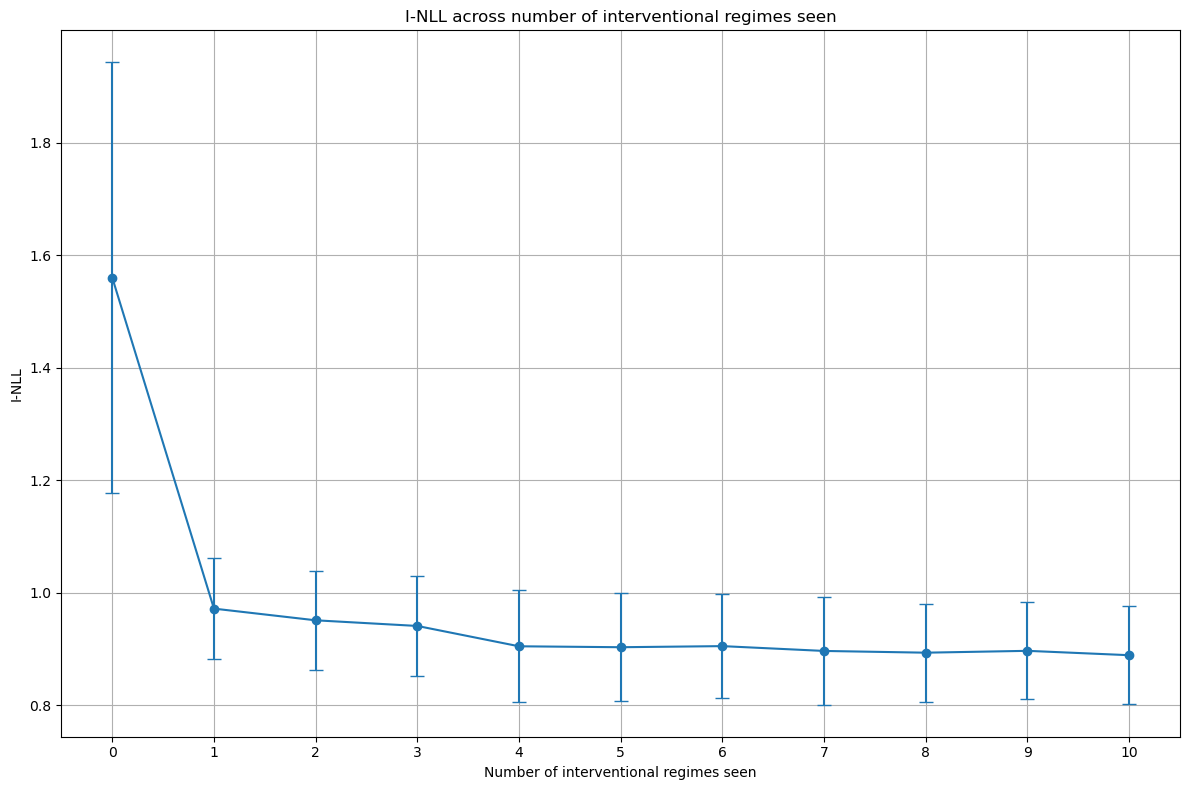

In [50]:
# Plot each metric separately with regimes on the x-axis, summarizing datasets with error bars
for metric_key, data in transposed_data.items():
    plt.figure(figsize=(12, 8))
    
    # Calculate mean and standard deviation for each regime across datasets
    means = [np.mean([data[dataset_index][i] for dataset_index in dataset_indices if data[dataset_index][i] is not None]) for i in range(len(x_labels))]
    stds = [np.std([data[dataset_index][i] for dataset_index in dataset_indices if data[dataset_index][i] is not None]) for i in range(len(x_labels))]
    
    # Plot the mean with error bars
    plt.errorbar(x_labels, means, yerr=stds, fmt='-o', capsize=5, label=f"{metric_key.upper()} Mean ± Std")
    
    plt.xlabel("Number of interventional regimes seen")
    metric_str = 'I-NLL' if metric_key == 'nll_val' else metric_key.upper()
    plt.ylabel(metric_str)
    plt.title(f"{metric_str} across number of interventional regimes seen")
    plt.xticks(ticks=x_labels, labels=[str(label) for label in x_labels], rotation=0)
    plt.grid(True)
    plt.tight_layout()
    plt.show()